## Merge file 

In [2]:
import csv
import pandas as pd 

# Generate filenames programmatically
path = "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTBBE/100sim60Xgb1StatData/"
files = [path + "new_final_balance_{}.csv".format(i) for i in range(100)]

merged_filename = "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTraining/StatTestXgb1/60stat_merge_result.csv"

with open(merged_filename, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    
    for index, filename in enumerate(files):
        with open(filename, 'r') as infile:
            reader = csv.reader(infile)
            
            # Skip header only if it's not the first file
            if index != 0:
                next(reader, None)
                
            # Write rows from current file to the output file
            writer.writerows(reader)

## Find average of each betting agents. 

In [3]:
import pandas as pd

# Read the data
df = pd.read_csv(
    "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTraining/StatTestXgb1/60stat_merge_result.csv",
    header=None,
)

# Drop the header row
df = df.drop(0)

# Convert all values to float
df = df.astype(float)

# Define ranges for mapping => to group agents with same type/category
ranges = [ 
    (0, 10, 1),
    (10, 20, 2),
    (20, 30, 3),
    (30, 40, 4),
    (40, 50, 5),
    (50, 55, 6),
    (55, 60, 7)
]

# Create a mapping function based on ranges
def get_mapping(col):
    for start, end, category in ranges:
        if start <= col < end:
            return category

# Create a new DataFrame with mapped columns
mapped_df = df.copy()
mapped_df.columns = [get_mapping(col) for col in df.columns]

# Group by column categories and compute the mean
averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()
averaged_df = averaged_df - 100000000

print(averaged_df)

              1            2          3           4          5            6  \
1    -88.445049  -709.810789 -44.315079 -472.650000  43.386001  1234.626100   
2   -615.318479  1382.427903 -57.900000 -129.000000  34.800000  -497.147972   
3   -256.252320   334.494021 -22.211323 -217.053683  29.096638    23.182950   
4   -604.881324   552.354500 -32.207069  -94.479007  37.317694   166.633507   
5   -262.589079  2889.047387 -64.778012 -288.000000  57.932005 -4498.524255   
..          ...          ...        ...         ...        ...          ...   
96  -194.660821  2685.855848  12.827155 -124.676351  44.885031 -5318.511047   
97  -331.435663  -183.570244  20.172235 -136.200000  12.000000   350.518423   
98  -208.500000    93.600000 -14.700000 -100.800000  14.400000  -138.900000   
99    12.000000   173.850000 -19.275000 -182.850000  16.500000  -716.550000   
100  -49.257306   234.757704   9.843642 -172.970577  21.979913  -156.476960   

               7  
1    1309.043733  
2    -732.870

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_8704/1056777104.py:37: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()


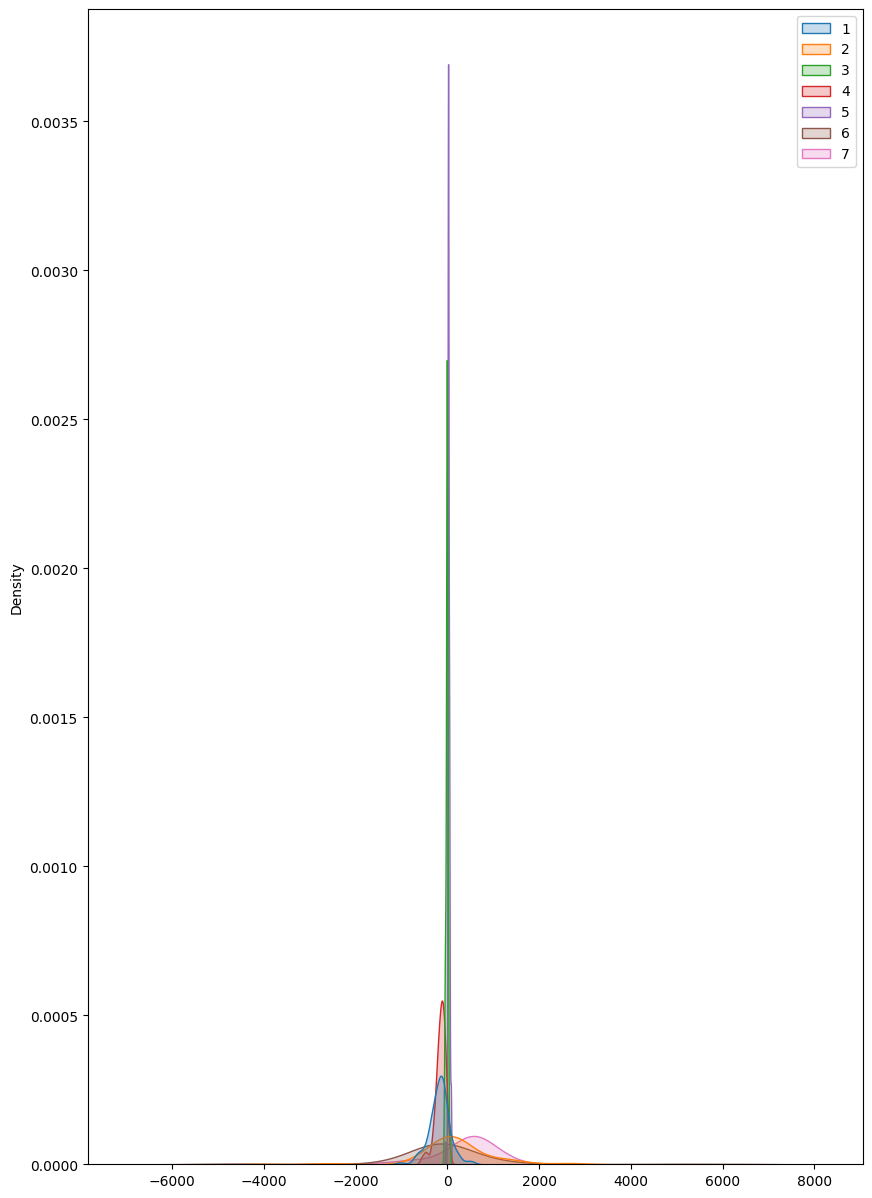

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))
distributionPlot = sns.kdeplot(data=averaged_df,fill=True)
plt.show()


## Statistical Testing

In [5]:
from scipy import stats
xgboost1_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    # Check normality for both columns
    _, pvalue_xgboost1 = stats.shapiro(xgboost1_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost1",pvalue_xgboost1)
    print("pvalue_other_agent ",pvalue_other_agent)
    # If both are normally distributed
    if pvalue_xgboost1 > 0.05 and pvalue_other_agent > 0.05:
        
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


P_value_xgboost1 5.37480368072518e-06
pvalue_other_agent  0.003399453505196242
not normal
There is a statistically significant difference
P-Value 7.07070948907163e-16

P_value_xgboost1 5.37480368072518e-06
pvalue_other_agent  2.5001817745191753e-09
not normal
There is a statistically significant difference
P-Value 0.0002811267698046309

P_value_xgboost1 5.37480368072518e-06
pvalue_other_agent  0.05516042245662811
not normal
There is a statistically significant difference
P-Value 3.9253284541604214e-13

P_value_xgboost1 5.37480368072518e-06
pvalue_other_agent  7.892615897622555e-06
not normal
There is a statistically significant difference
P-Value 1.9809709402944854e-16

P_value_xgboost1 5.37480368072518e-06
pvalue_other_agent  1.2547810653519681e-05
not normal
There is a statistically significant difference
P-Value 1.7796555160221125e-11

P_value_xgboost1 5.37480368072518e-06
pvalue_other_agent  9.145221755933517e-13
not normal
There is a statistically significant difference
P-Value 3.

# Stat test with plotting

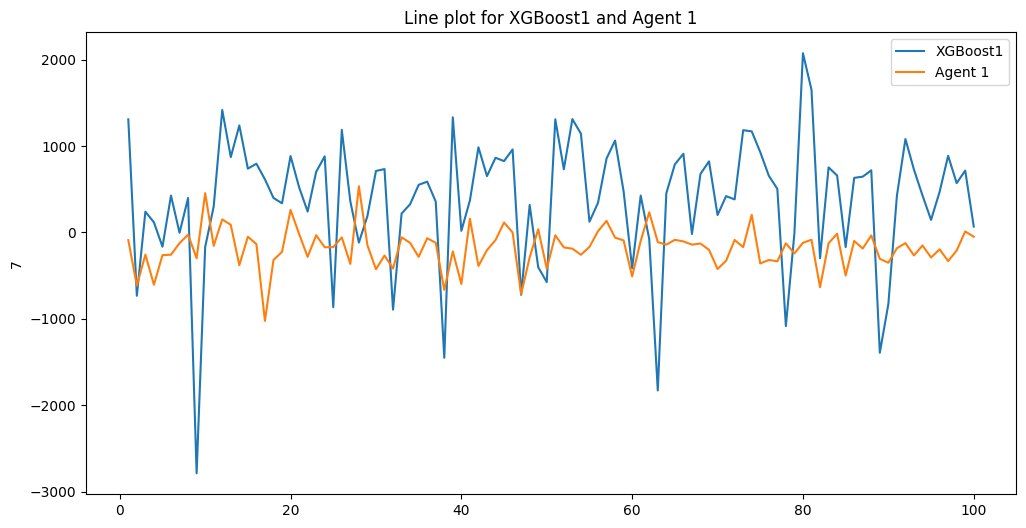

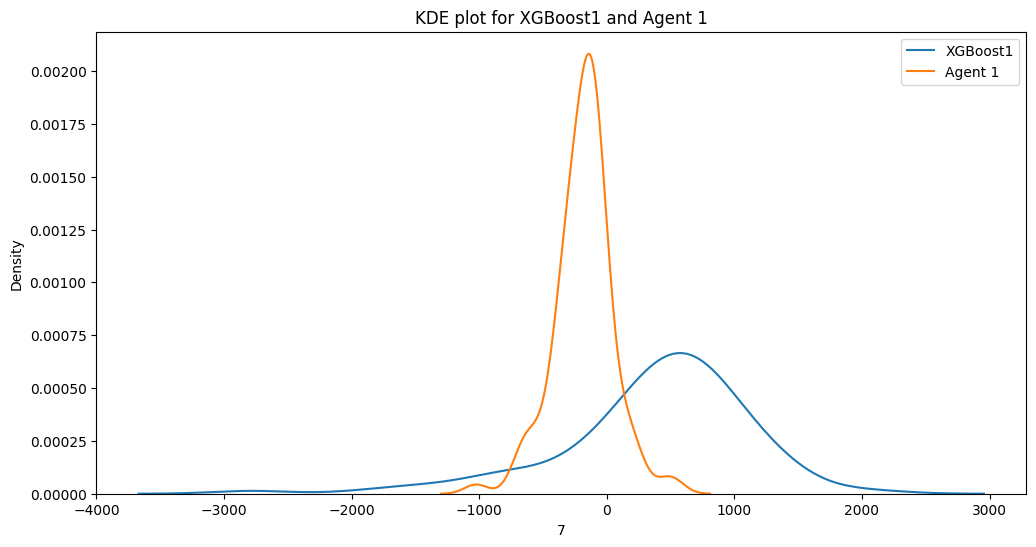

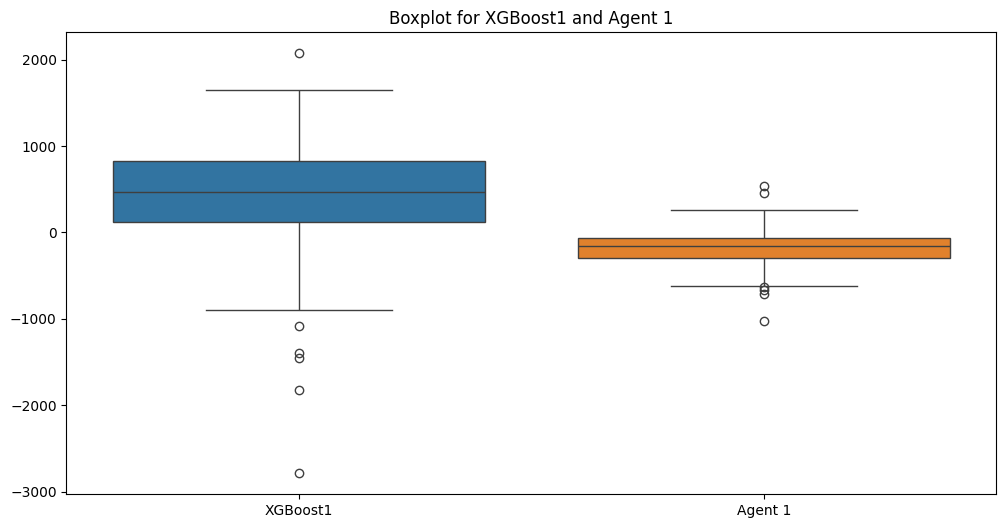

P_value_xgboost1 5.37480368072518e-06
pvalue_other_agent  0.003399453505196242
not normal
There is a statistically significant difference
P-Value 7.07070948907163e-16



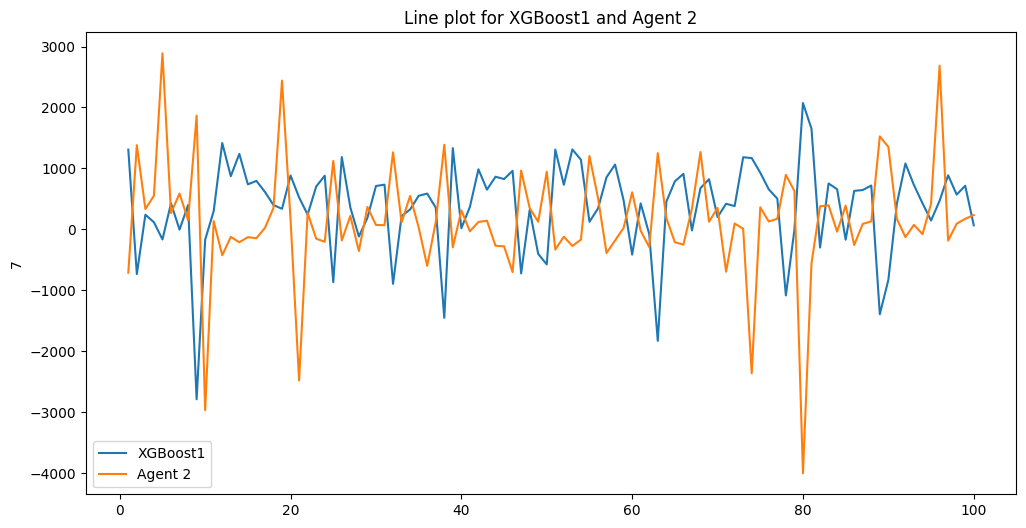

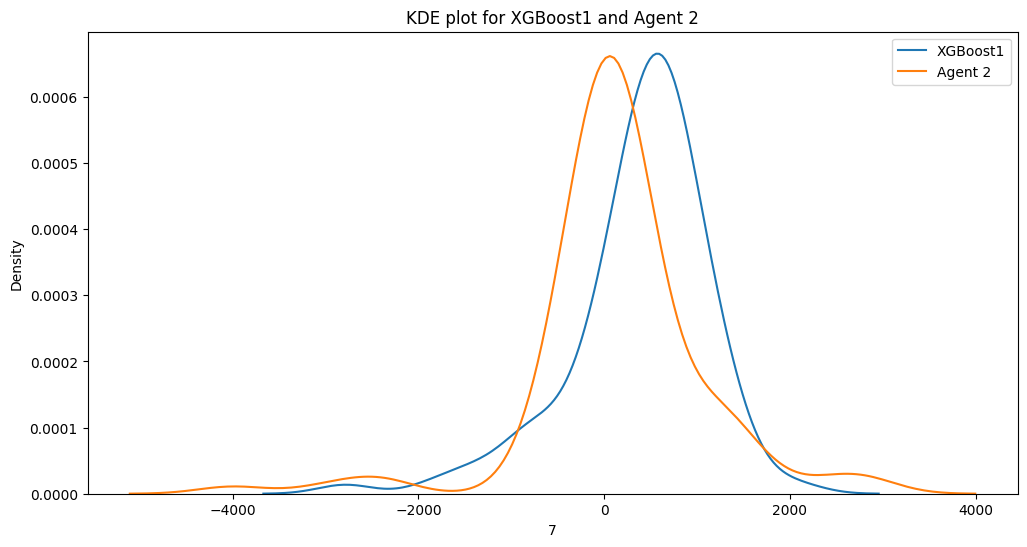

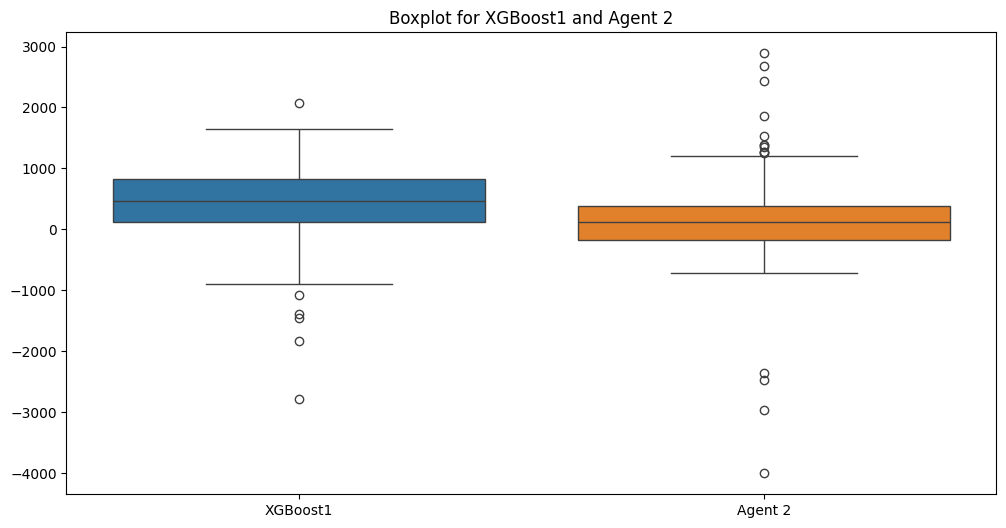

P_value_xgboost1 5.37480368072518e-06
pvalue_other_agent  2.5001817745191753e-09
not normal
There is a statistically significant difference
P-Value 0.0002811267698046309



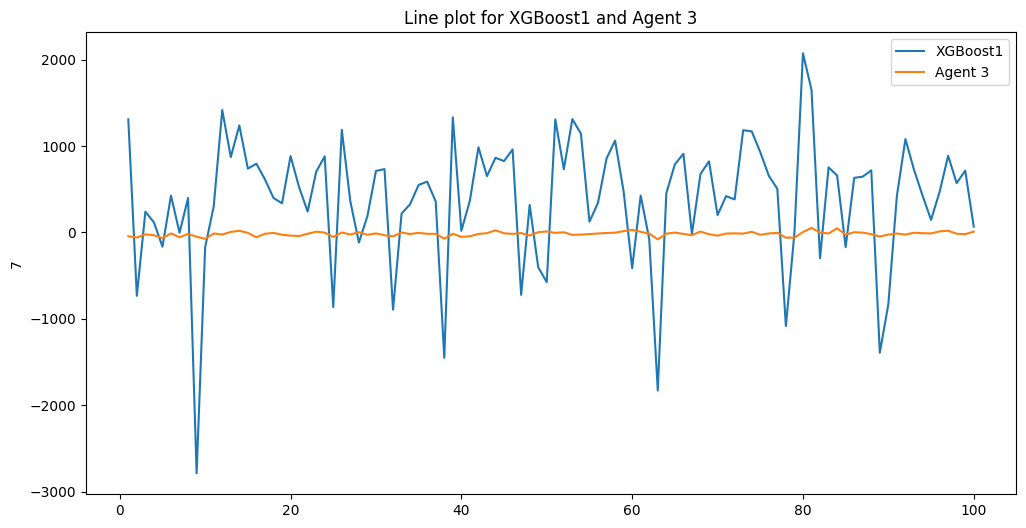

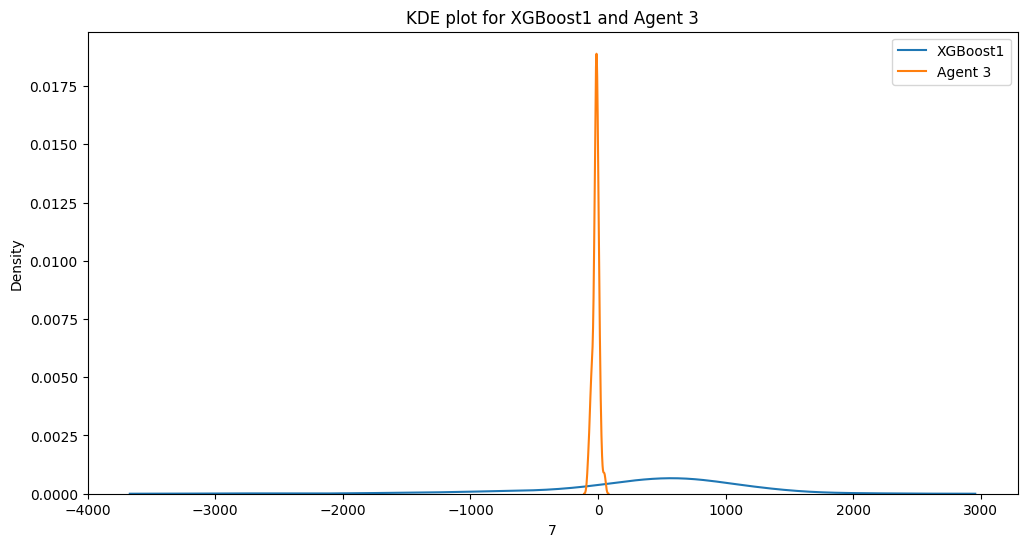

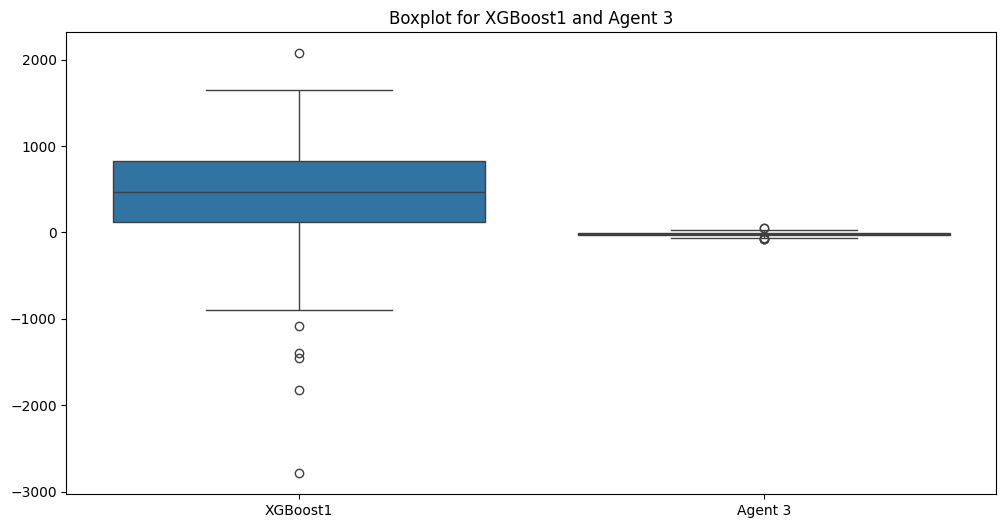

P_value_xgboost1 5.37480368072518e-06
pvalue_other_agent  0.05516042245662811
not normal
There is a statistically significant difference
P-Value 3.9253284541604214e-13



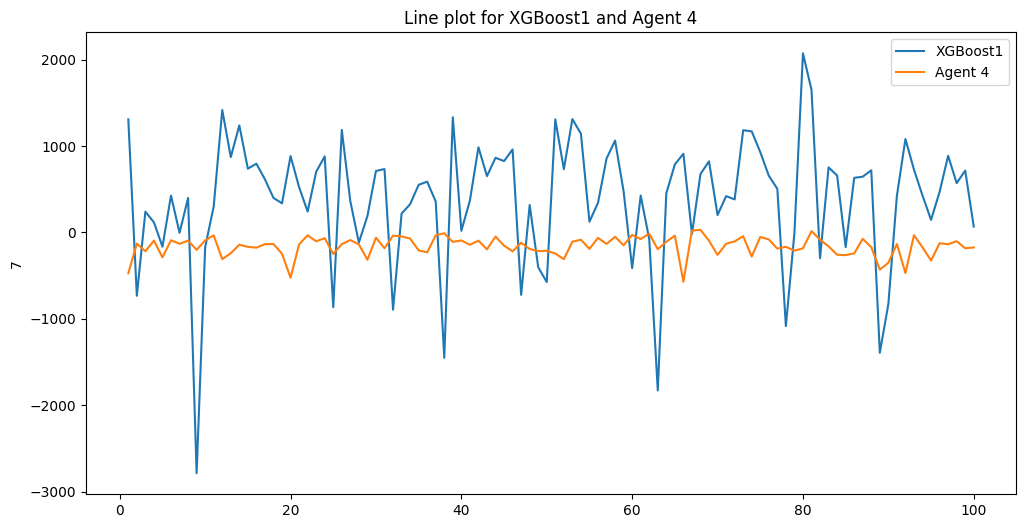

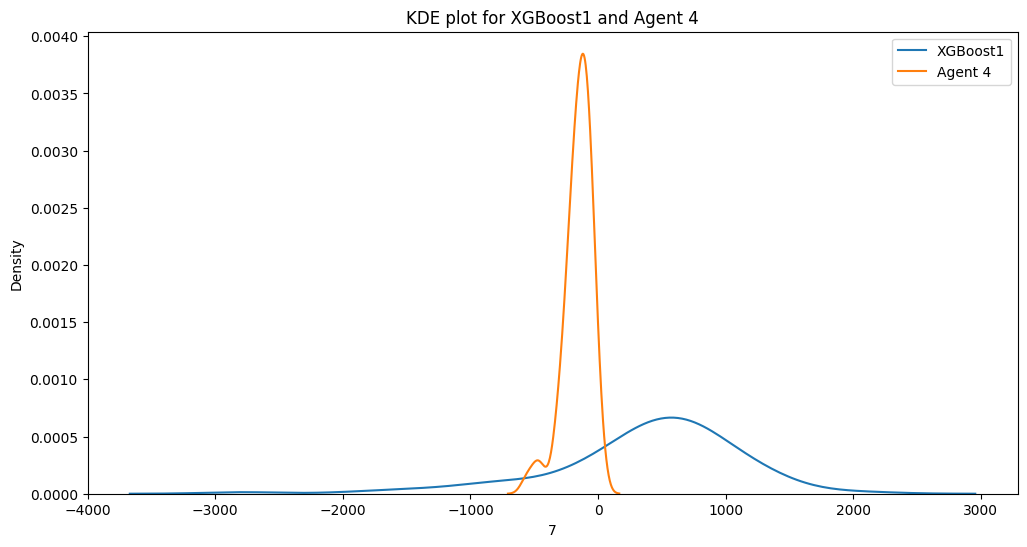

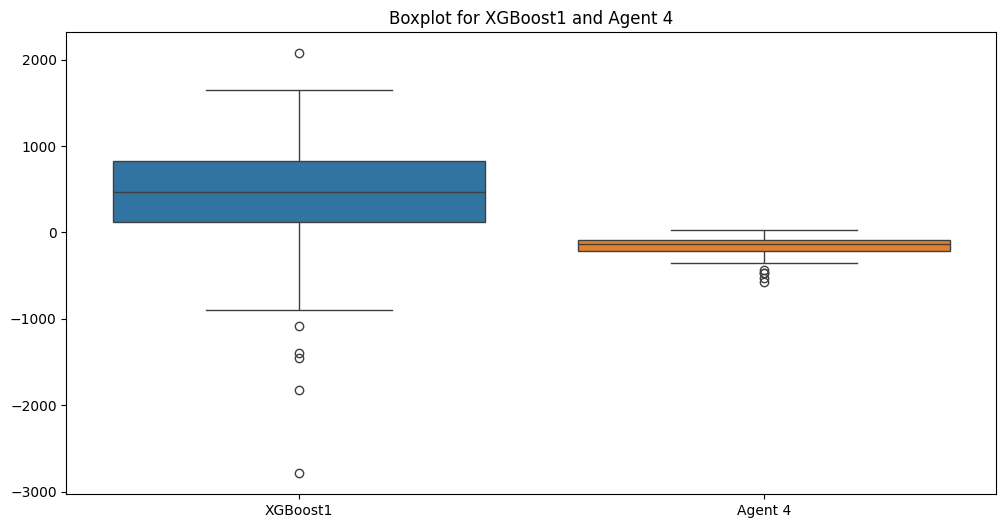

P_value_xgboost1 5.37480368072518e-06
pvalue_other_agent  7.892615897622555e-06
not normal
There is a statistically significant difference
P-Value 1.9809709402944854e-16



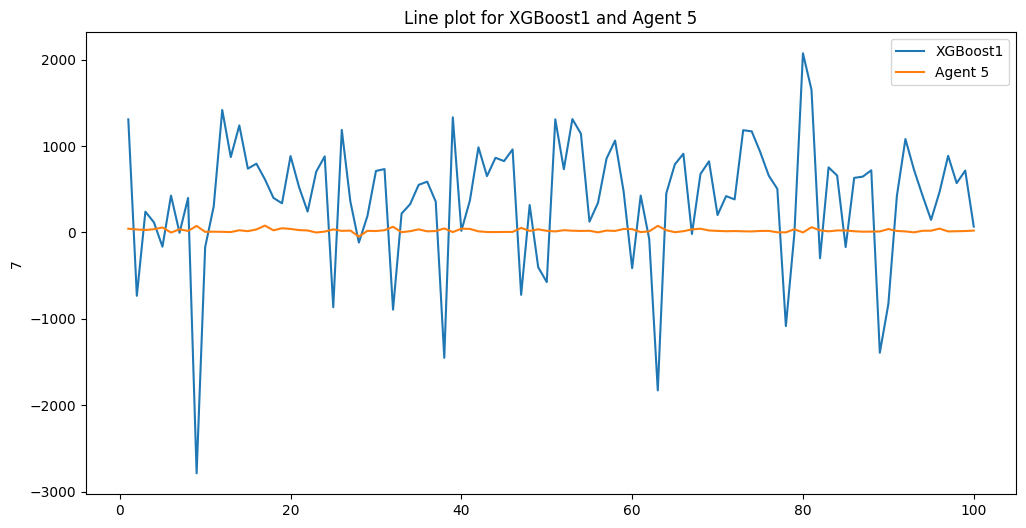

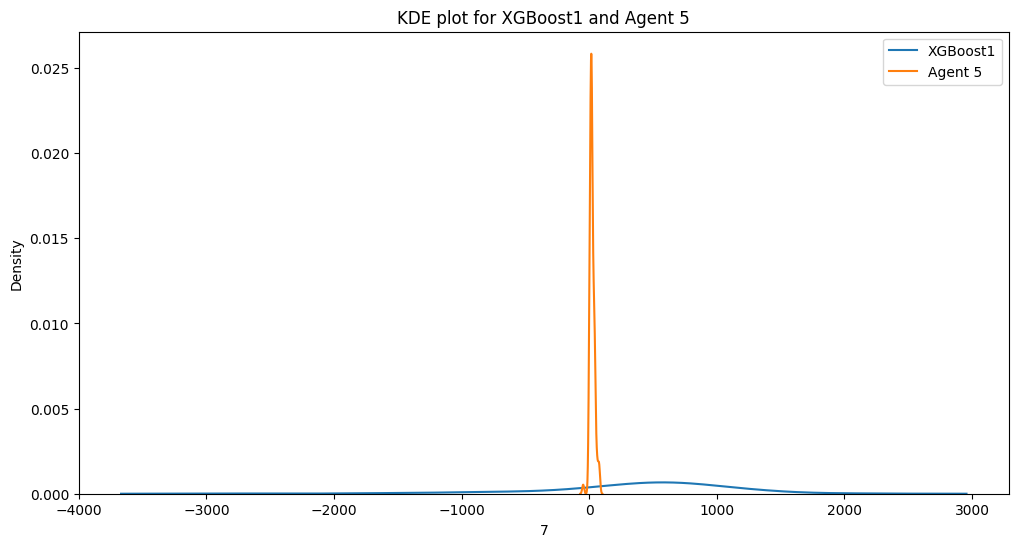

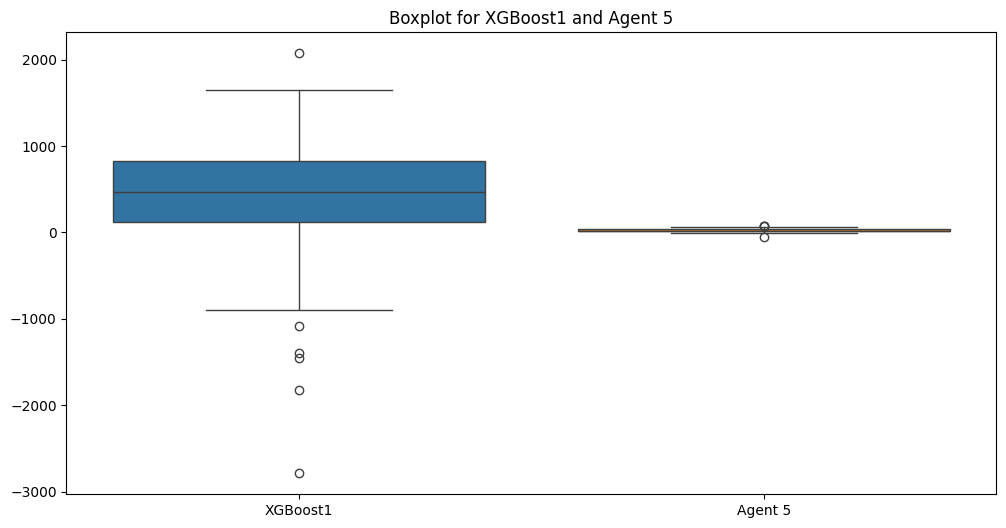

P_value_xgboost1 5.37480368072518e-06
pvalue_other_agent  1.2547810653519681e-05
not normal
There is a statistically significant difference
P-Value 1.7796555160221125e-11



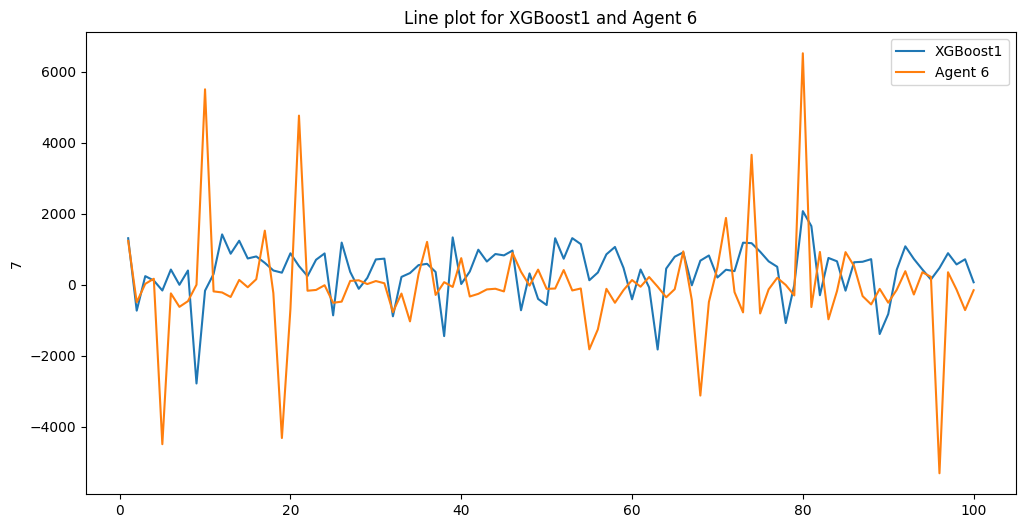

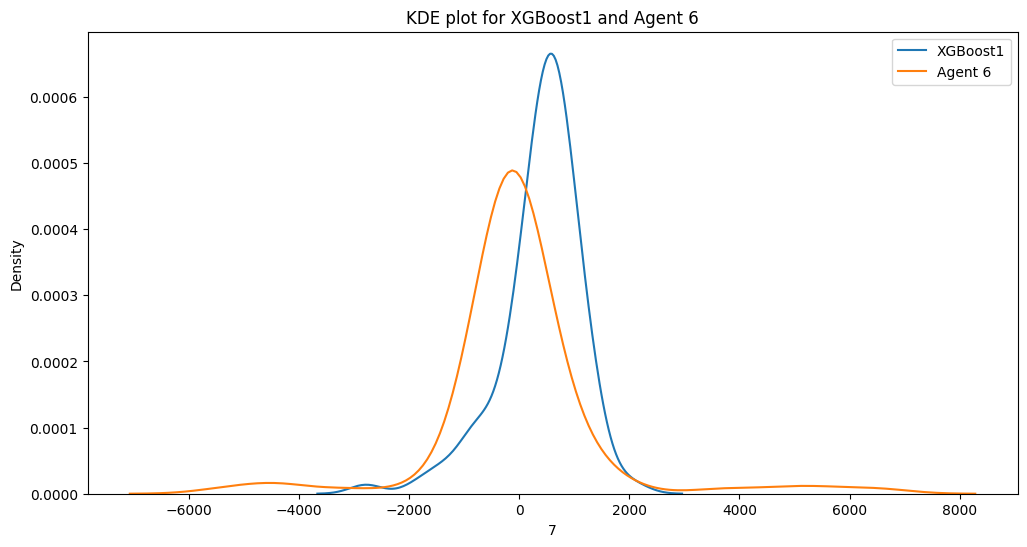

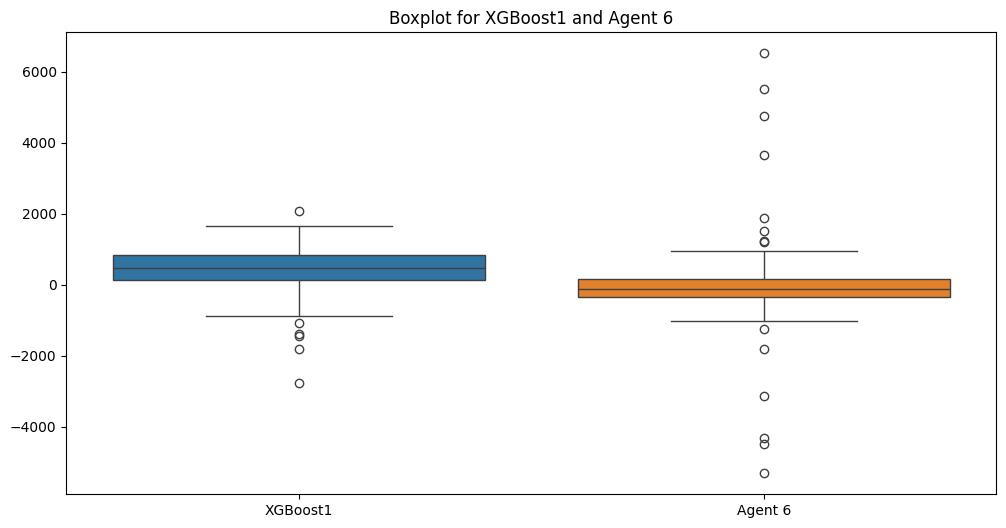

P_value_xgboost1 5.37480368072518e-06
pvalue_other_agent  9.145221755933517e-13
not normal
There is a statistically significant difference
P-Value 3.6671013789415925e-08



In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost1_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]

    # Line plot for XGBoost and the other agent
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=xgboost1_avg_balance, label='XGBoost1')
    sns.lineplot(data=other_agent_balance, label='Agent ' + str(col_index+1))
    plt.title('Line plot for XGBoost1 and Agent ' + str(col_index+1))
    plt.legend()
    plt.show()

    # KDE plot for the distributions
    plt.figure(figsize=(12, 6))
    sns.kdeplot(xgboost1_avg_balance, label='XGBoost1')
    sns.kdeplot(other_agent_balance, label='Agent ' + str(col_index+1))
    plt.title('KDE plot for XGBoost1 and Agent ' + str(col_index+1))
    plt.legend()
    plt.show()

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost1_avg_balance.rename('XGBoost1'), 
                               other_agent_balance.rename('Agent ' + str(col_index+1))], axis=1)
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=combined_data)
    plt.title('Boxplot for XGBoost1 and Agent ' + str(col_index+1))
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost1 = stats.shapiro(xgboost1_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost1", pvalue_xgboost1)
    print("pvalue_other_agent ", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost1 > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


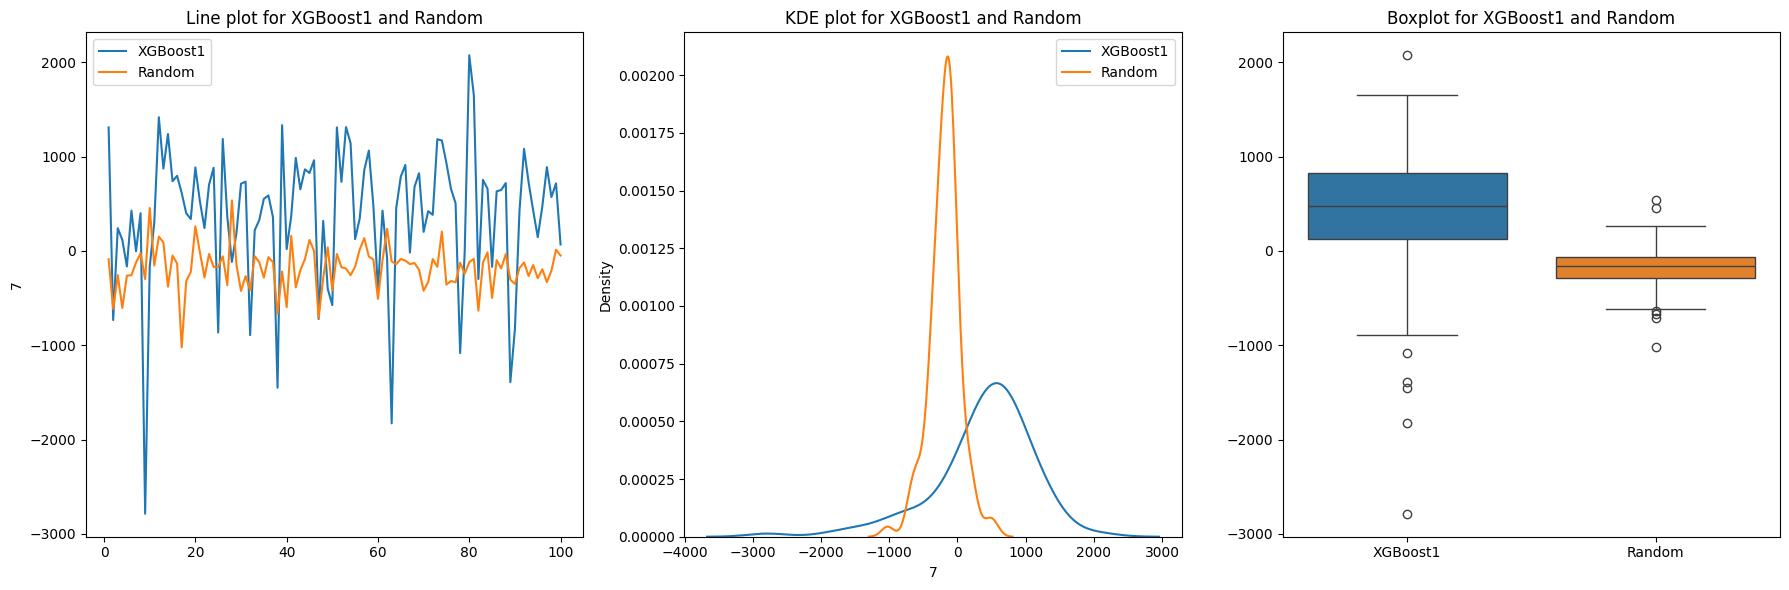

P_value_xgboost1 5.37480368072518e-06
P_value_Random 0.003399453505196242
not normal
There is a statistically significant difference
P-Value 7.07070948907163e-16



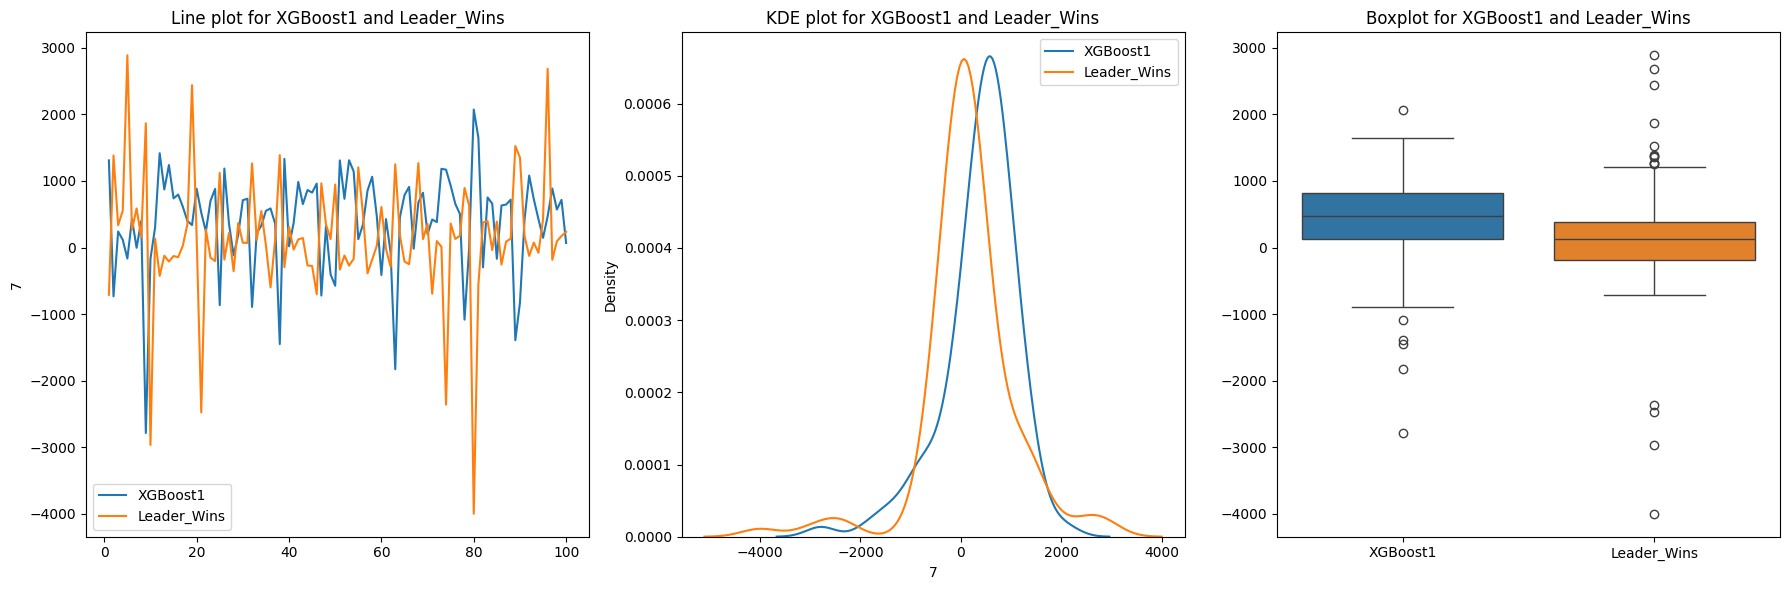

P_value_xgboost1 5.37480368072518e-06
P_value_Leader_Wins 2.5001817745191753e-09
not normal
There is a statistically significant difference
P-Value 0.0002811267698046309



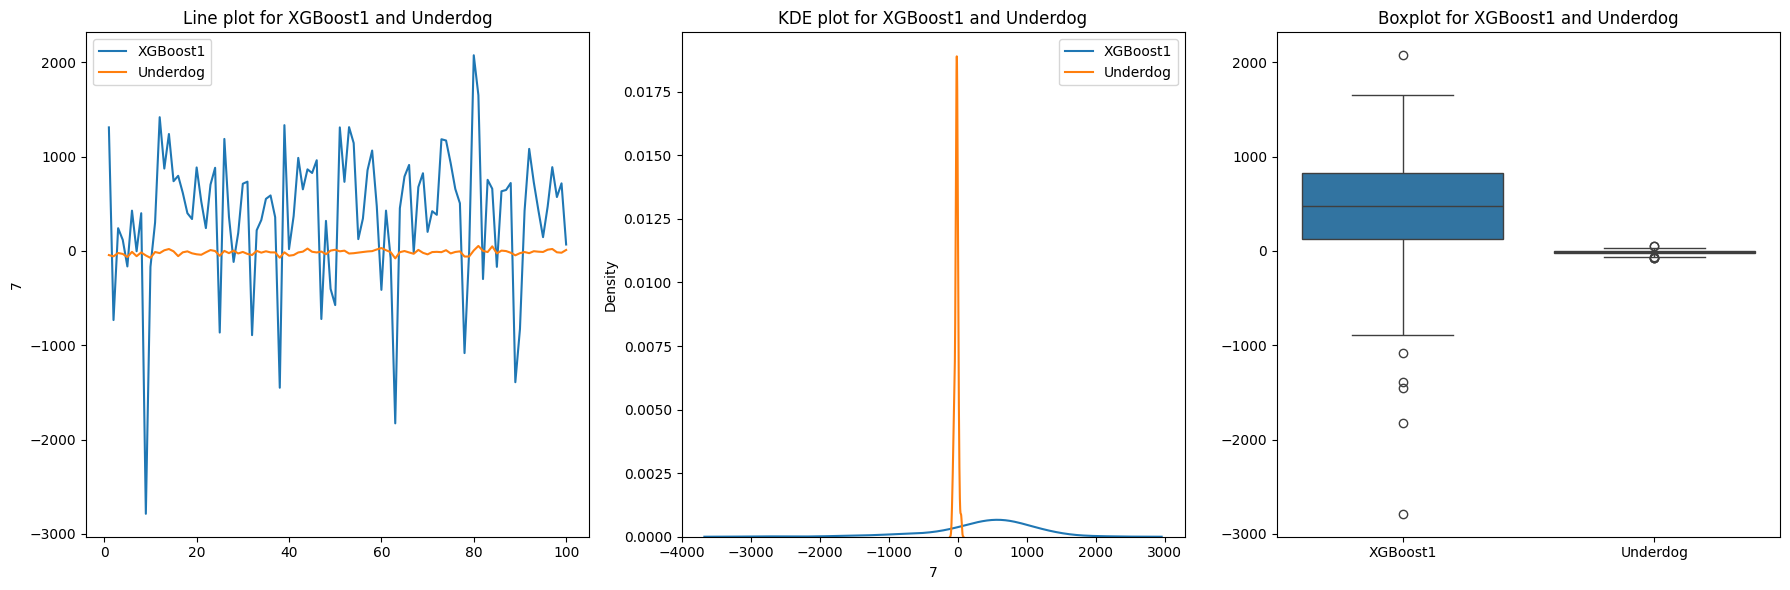

P_value_xgboost1 5.37480368072518e-06
P_value_Underdog 0.05516042245662811
not normal
There is a statistically significant difference
P-Value 3.9253284541604214e-13



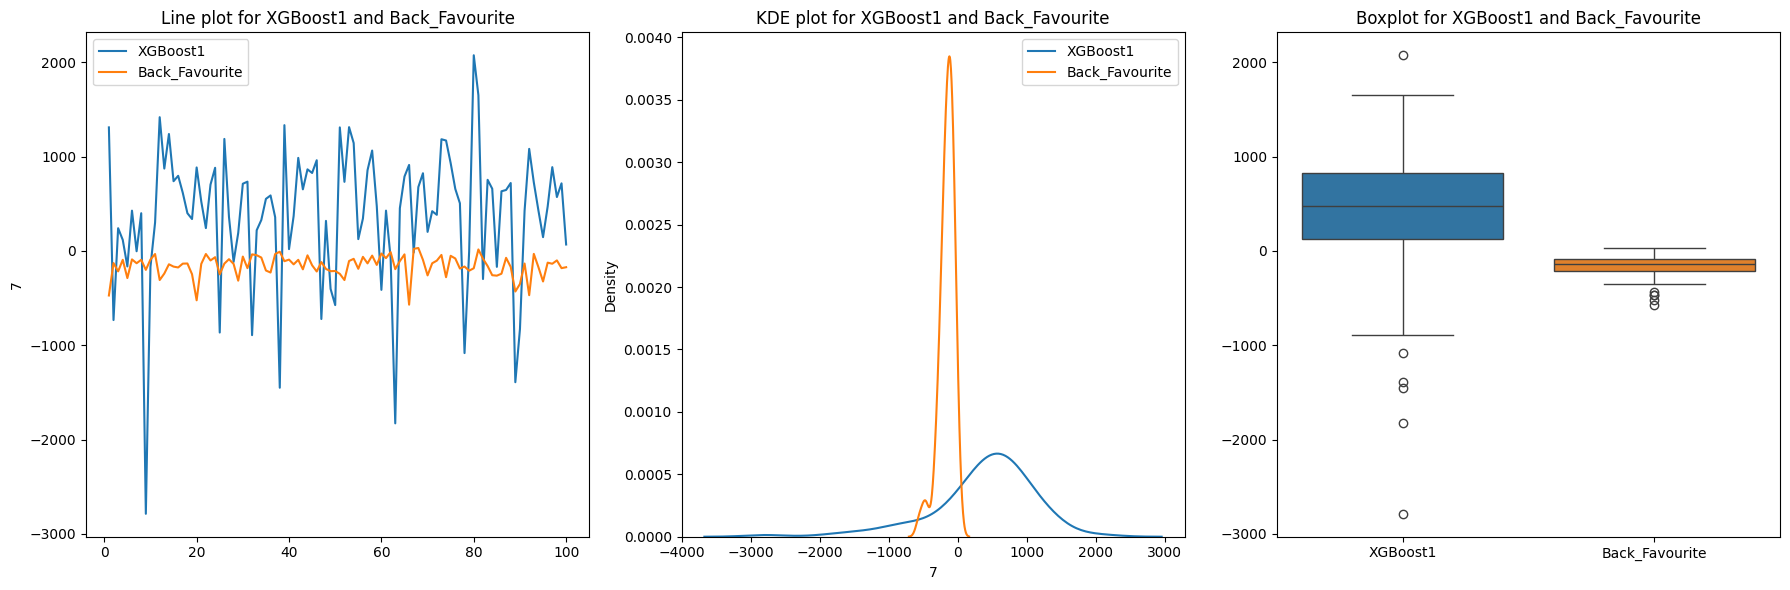

P_value_xgboost1 5.37480368072518e-06
P_value_Back_Favourite 7.892615897622555e-06
not normal
There is a statistically significant difference
P-Value 1.9809709402944854e-16



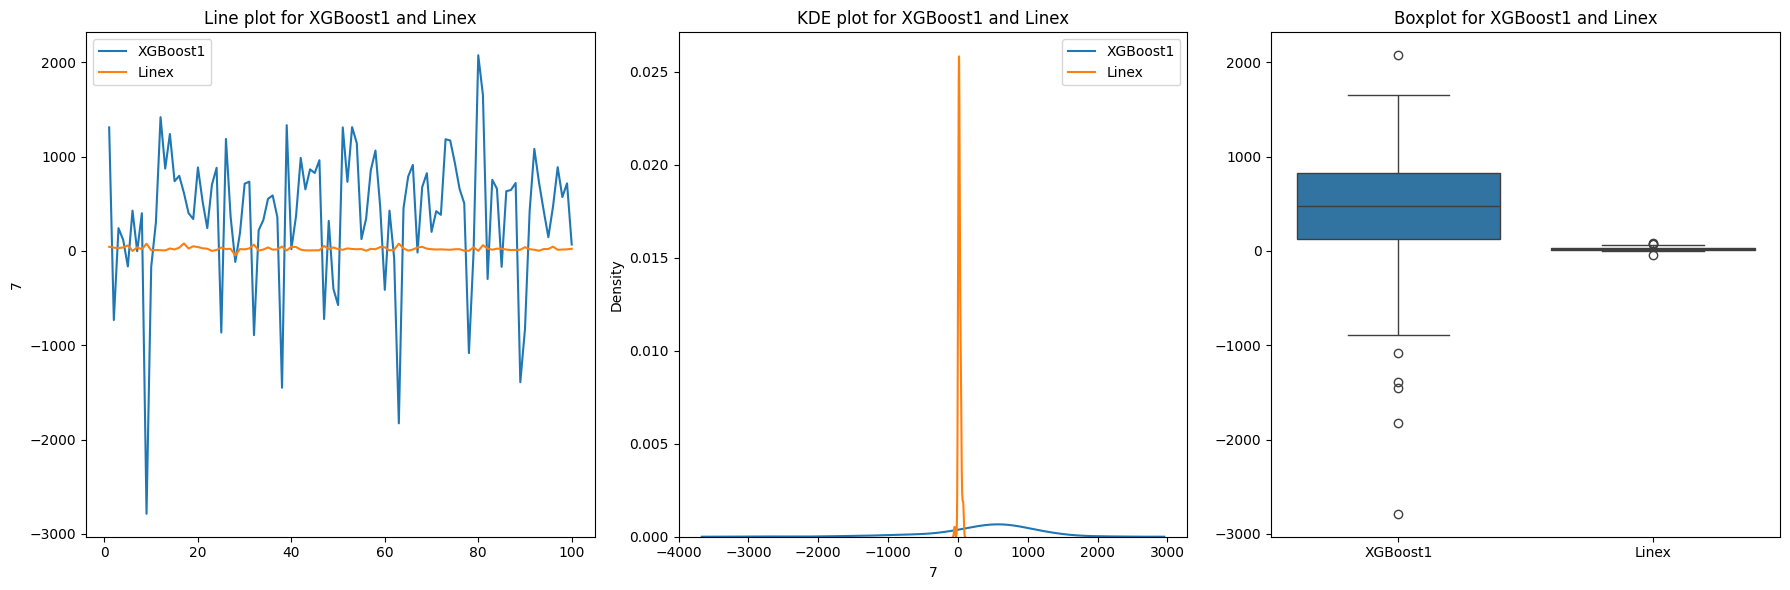

P_value_xgboost1 5.37480368072518e-06
P_value_Linex 1.2547810653519681e-05
not normal
There is a statistically significant difference
P-Value 1.7796555160221125e-11



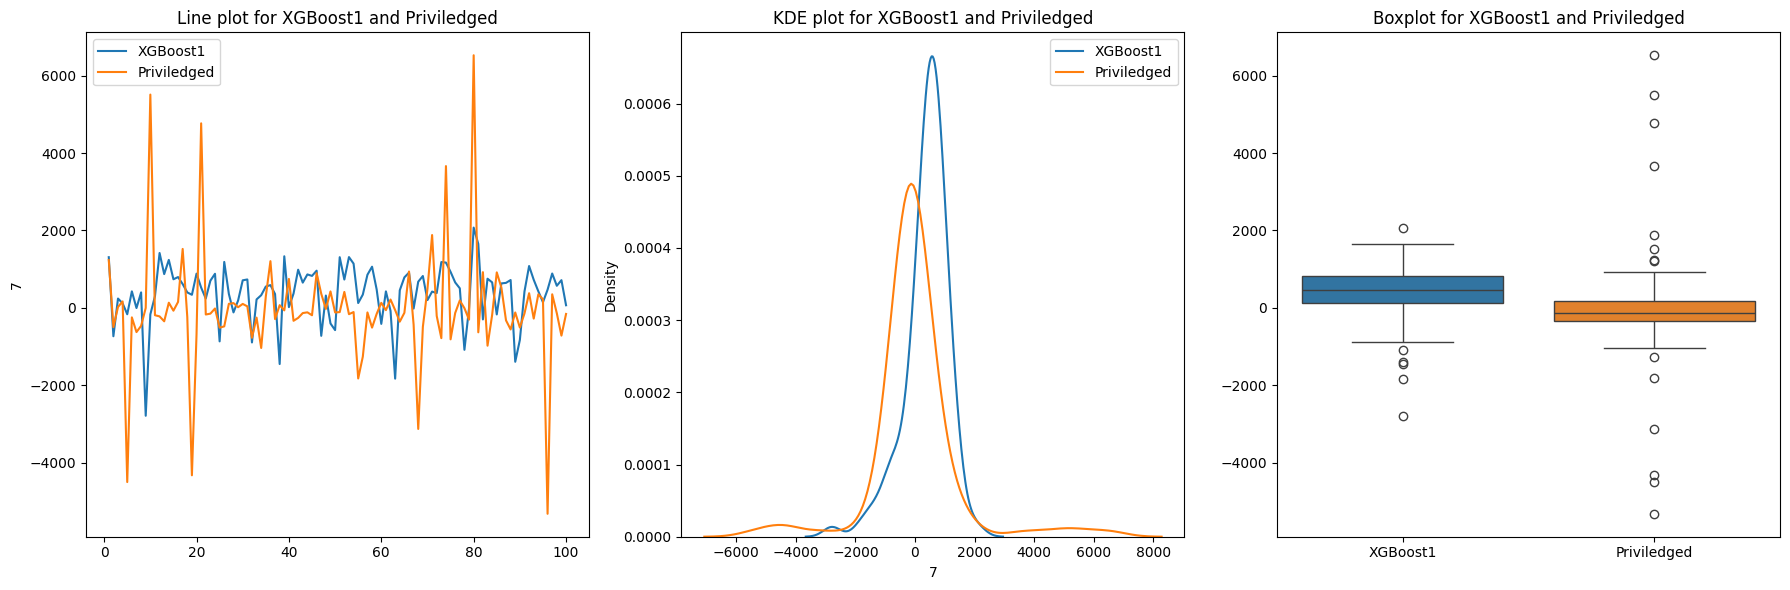

P_value_xgboost1 5.37480368072518e-06
P_value_Priviledged 9.145221755933517e-13
not normal
There is a statistically significant difference
P-Value 3.6671013789415925e-08



In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost1_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Define agent names for easier access and readability
agent_names = ["Random", "Leader_Wins", "Underdog", "Back_Favourite", "Linex", "Priviledged"]

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost1_avg_balance, ax=axes[0], label='XGBoost1')
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f'Line plot for XGBoost1 and {agent_name}')
    axes[0].legend()

    # KDE plot for the distributions
    sns.kdeplot(xgboost1_avg_balance, ax=axes[1], label='XGBoost1')
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f'KDE plot for XGBoost1 and {agent_name}')
    axes[1].legend()

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost1_avg_balance.rename('XGBoost1'), 
                               other_agent_balance.rename(agent_name)], axis=1)
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f'Boxplot for XGBoost1 and {agent_name}')
    
    plt.tight_layout()
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost1 = stats.shapiro(xgboost1_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost1", pvalue_xgboost1)
    print(f"P_value_{agent_name}", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost1 > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


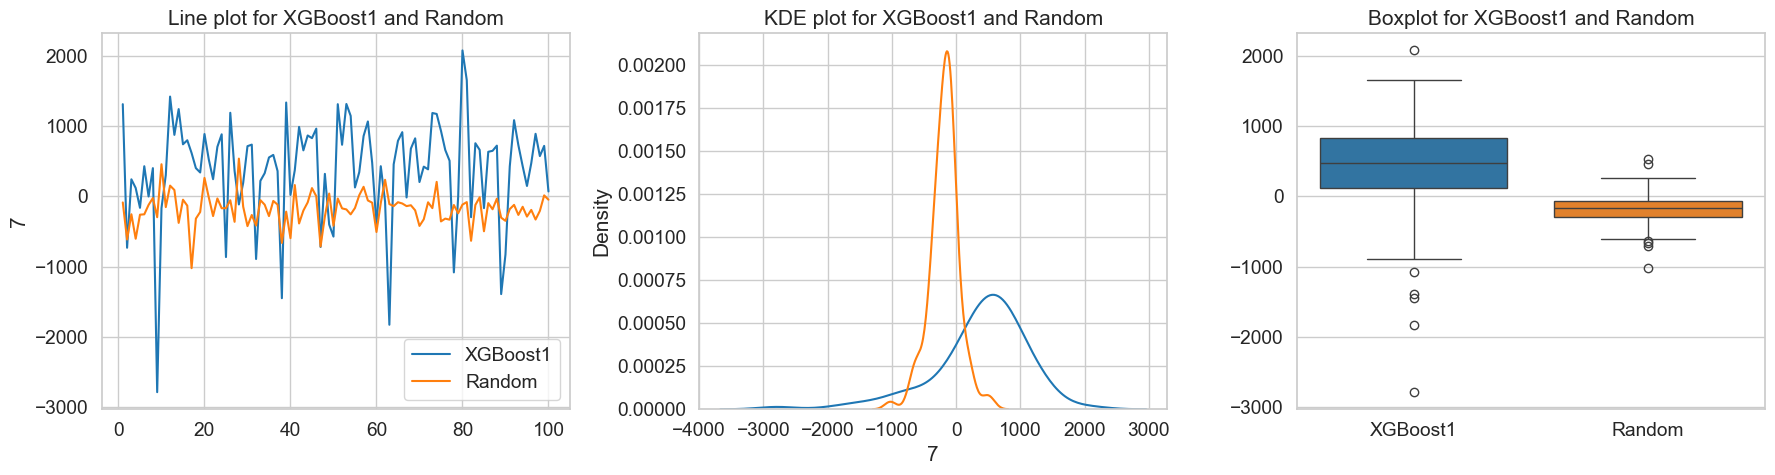

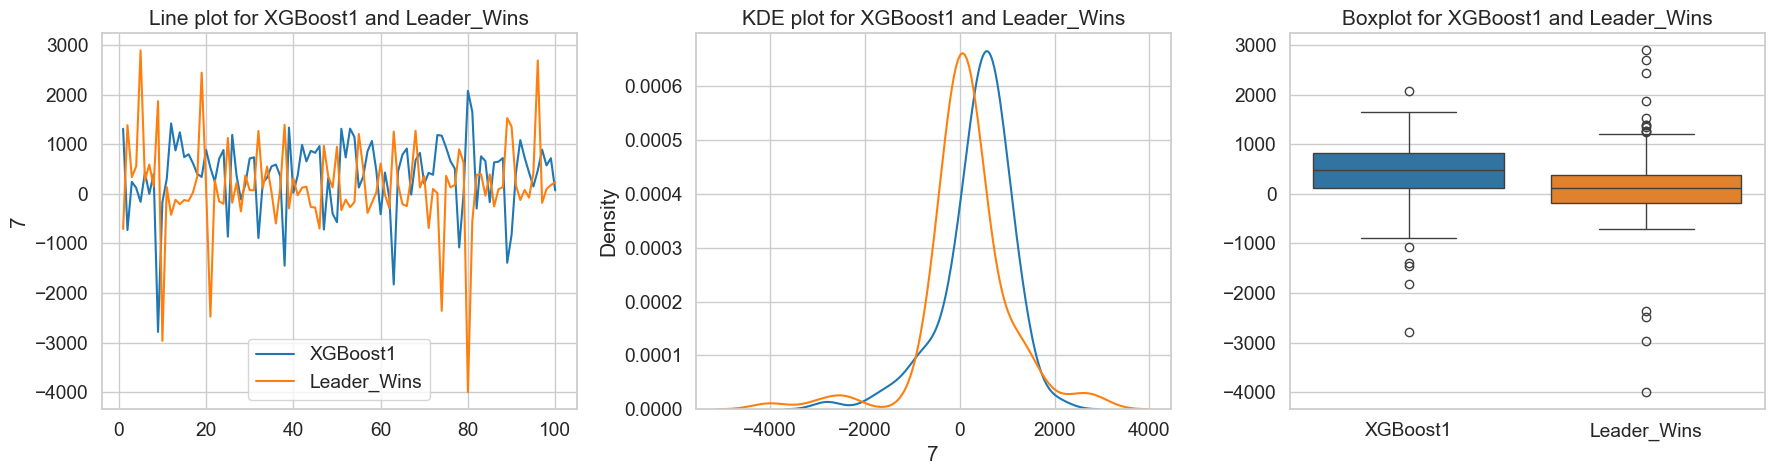

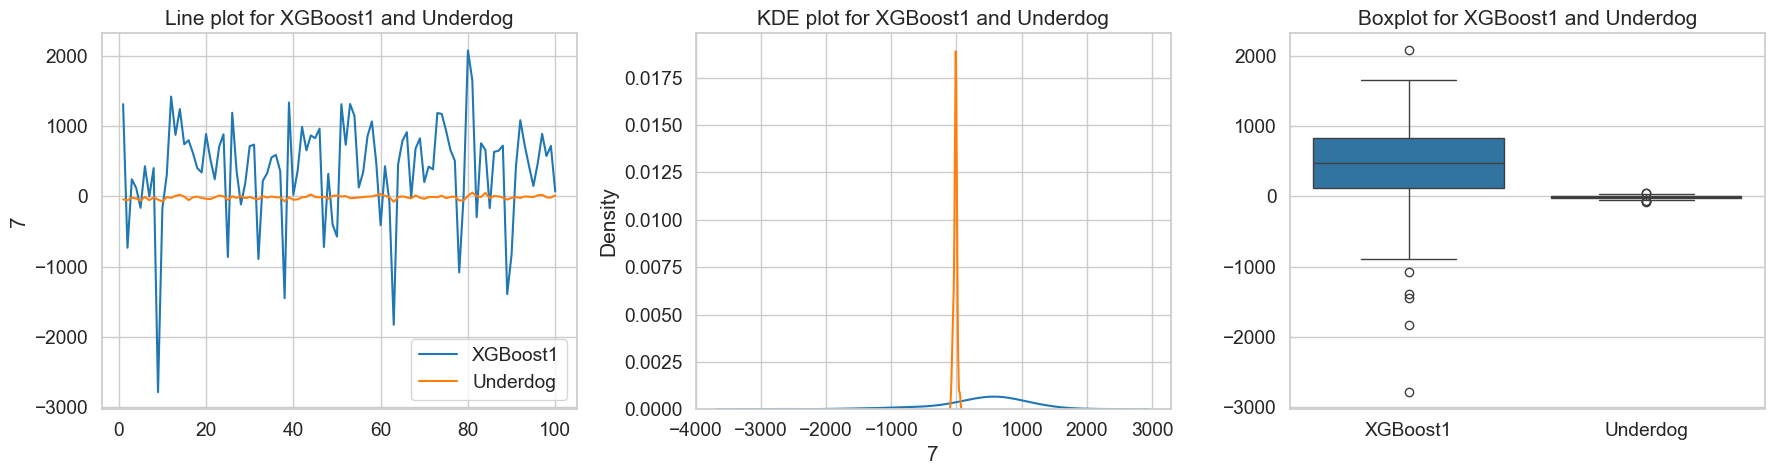

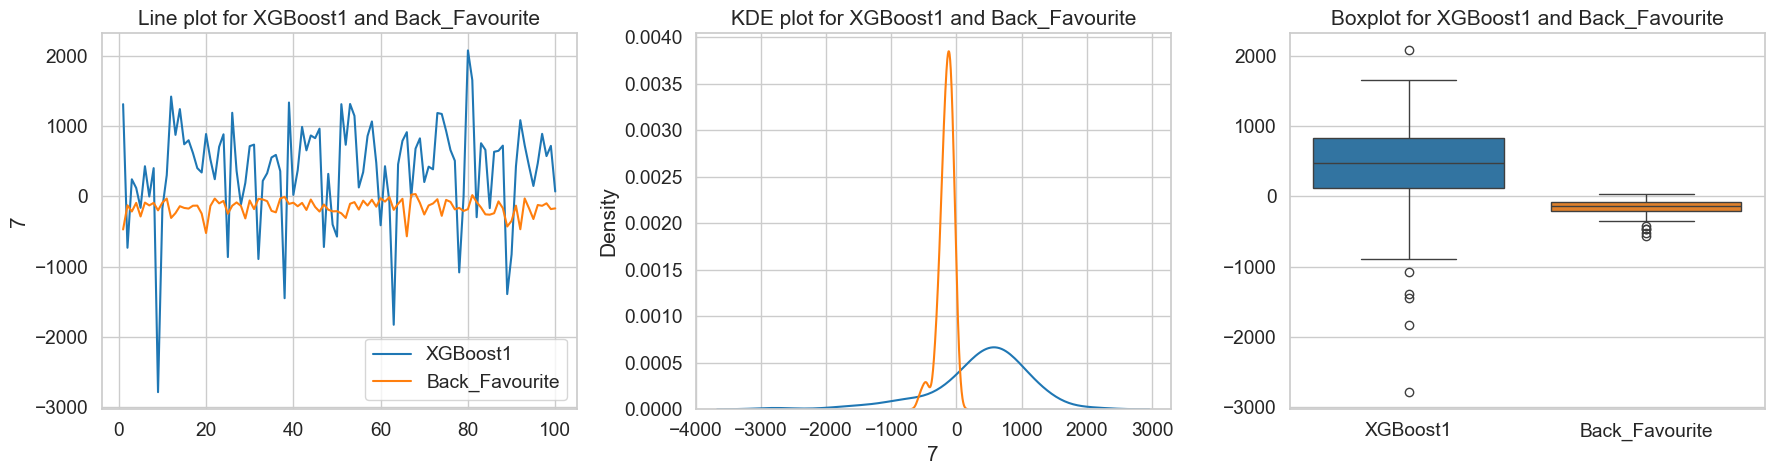

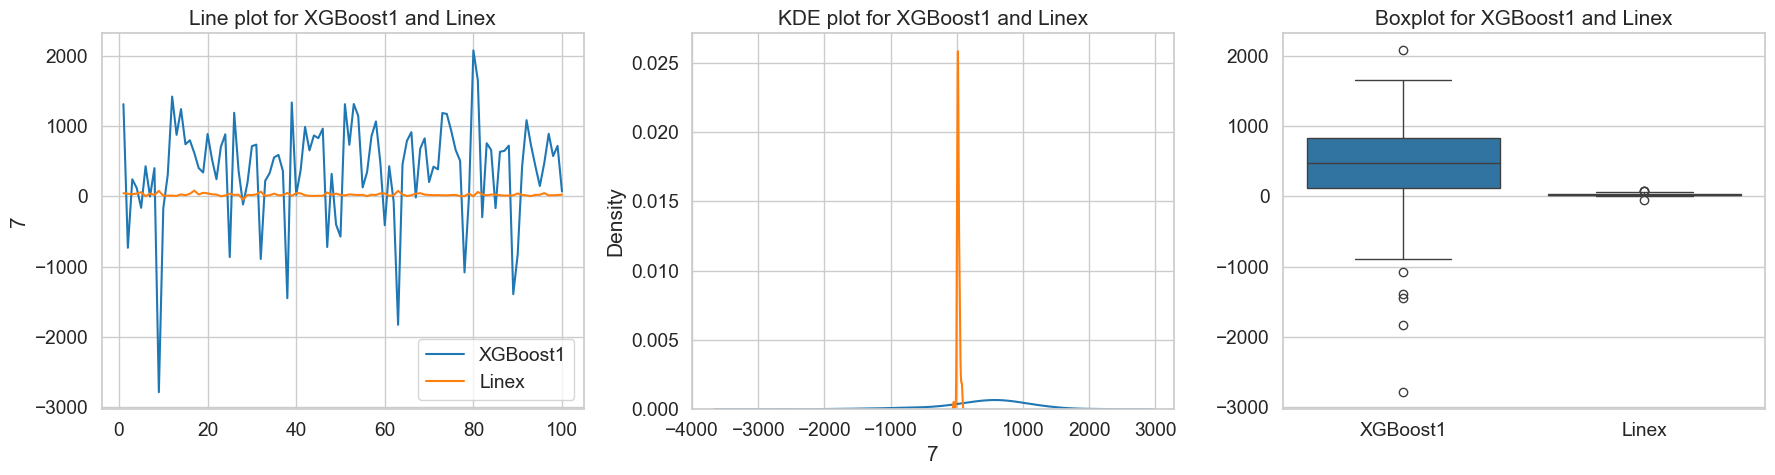

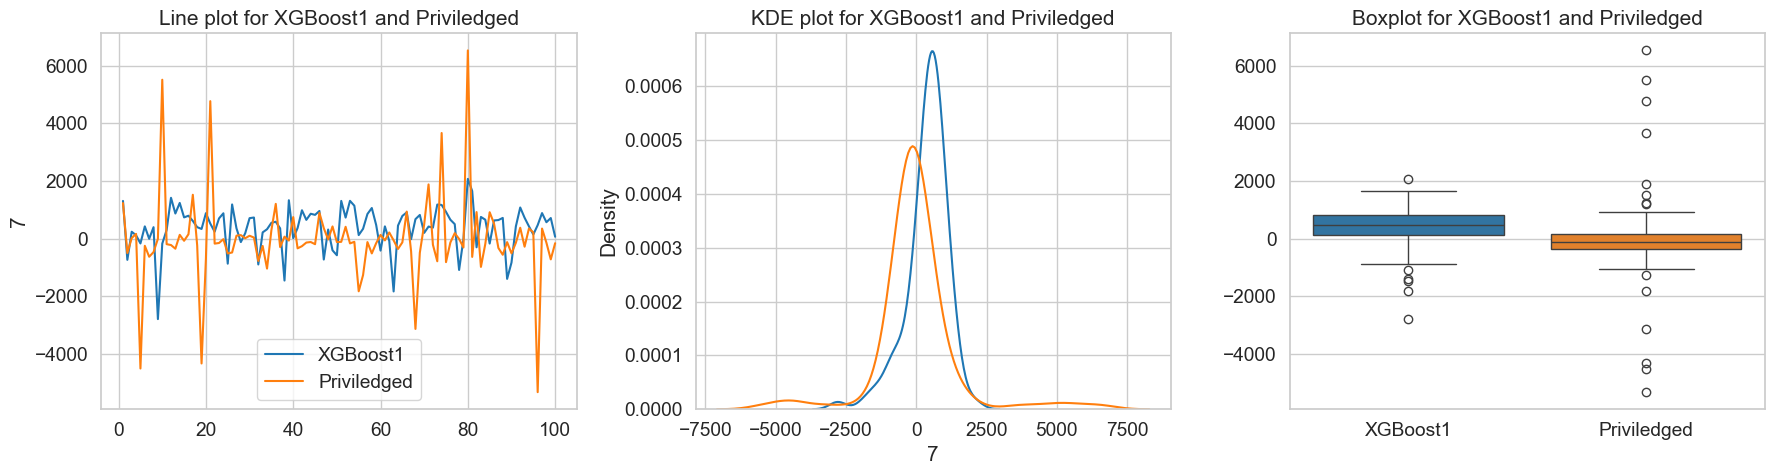

In [8]:
xgboost1_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Define agent names for easier access and readability
agent_names = ["Random", "Leader_Wins", "Underdog", "Back_Favourite", "Linex", "Priviledged"]

# Setting style and text scale for seaborn plots
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)  # Adjust the font_scale to increase text size

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally with modified height
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Decreased the height from 6 to 5

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost1_avg_balance, ax=axes[0], label='XGBoost1')
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f'Line plot for XGBoost1 and {agent_name}')

    # KDE plot for the distributions
    sns.kdeplot(xgboost1_avg_balance, ax=axes[1], label='XGBoost1')
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f'KDE plot for XGBoost1 and {agent_name}')

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost1_avg_balance.rename('XGBoost1'), 
                               other_agent_balance.rename(agent_name)], axis=1)
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f'Boxplot for XGBoost1 and {agent_name}')
    
    plt.tight_layout()
    plt.show()